In [36]:
import glob
import pandas as pd
billboard_files = [f for f in glob.glob("data/billboard200/charts_data*")]
artists, albums, ranks, weeks = [], [], [], []
for chart_data in billboard_files:
    with open(chart_data,'r') as f:
        for line in f:
            try:
                [artist, album, rank, week] = line.strip().split("\t")
                artists.append(artist)
                albums.append(album)
                ranks.append(rank)
                weeks.append(week)
            except:
                pass
                #print("error with line: %s" % line)

charts = pd.DataFrame({"artist":artists, "album":albums, "rank": ranks, "date":weeks})

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>artist_</th>
      <th>album_</th>
      <th>rank_max</th>
      <th>rank_count</th>
      <th>date_count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>!!! (Chk Chk Chk)</td>
      <td>Myth Takes</td>
      <td>195</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>"Weird Al" Yankovic</td>
      <td>"Weird Al" Yankovic In 3-D</td>
      <td>90</td>
      <td>23</td>
      <td>23</td>
    </tr>
    <tr>
      <th>2</th>
      <td>"Weird Al" Yankovic</td>
      <td>Alapalooza</td>
      <td>86</td>
      <td>24</td>
      <td>24</td>
    </tr>
    <tr>
      <th>3</th>
      <td>"Weird Al" Yankovic</td>
      <td>Alpocalypse</td>
      <td>9</td>
      <td>6</td>
      <td>6</td>
    </tr>
    <tr>
      <th>4</th>
      <td>"Weird Al" Yankovic</td>
      <td>Bad Hair Day</td>
      <td>98</td>
      <td>56</td>
      <td>56</td>
    </tr>
  </tbody>
</table>
</div>

In [45]:
#Some data about billboard charts: rank_max, rank_min, number of weeks spent on billboard,
# during which decade...
charts["year"] = pd.to_datetime(charts["date"], format="%Y-%m-%d").dt.year 
def decade(x):
    d = {}
    for y in x:
        decade = y // 10 * 10
        if decade not in d:
            d[decade] = 0
        else:
            d[decade] += 1
    max_d = max((v,k) for k, v in d.items())
    return max_d[1]

charts = charts.groupby(["artist","album"]).agg({"rank":['max',"min"],"date":"count","year":decade}).reset_index()
charts.columns = ['_'.join(col) for col in charts.columns]
charts.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>artist_</th>
      <th>album_</th>
      <th>rank_max</th>
      <th>rank_min</th>
      <th>date_count</th>
      <th>year_decade</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>!!! (Chk Chk Chk)</td>
      <td>Myth Takes</td>
      <td>195</td>
      <td>195</td>
      <td>1</td>
      <td>2000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>"Weird Al" Yankovic</td>
      <td>"Weird Al" Yankovic In 3-D</td>
      <td>90</td>
      <td>121</td>
      <td>23</td>
      <td>1980</td>
    </tr>
    <tr>
      <th>2</th>
      <td>"Weird Al" Yankovic</td>
      <td>Alapalooza</td>
      <td>86</td>
      <td>106</td>
      <td>24</td>
      <td>1990</td>
    </tr>
    <tr>
      <th>3</th>
      <td>"Weird Al" Yankovic</td>
      <td>Alpocalypse</td>
      <td>9</td>
      <td>101</td>
      <td>6</td>
      <td>2010</td>
    </tr>
    <tr>
      <th>4</th>
      <td>"Weird Al" Yankovic</td>
      <td>Bad Hair Day</td>
      <td>98</td>
      <td>102</td>
      <td>56</td>
      <td>1990</td>
    </tr>
  </tbody>
</table>
</div>

In [79]:
def json_to_df(filenames):
    list_df = []
    for f in filenames:
        with open(f,'r') as file:
            list_df.append(pd.DataFrame.from_records(map(json.loads, file)))
    return pd.concat(list_df, ignore_index=True)

In [85]:
import json
audio_features_files = [f for f in glob.glob("data/audio_features/audio*")]
track_description_files = [f for f in glob.glob("data/audio_features/extracted*")]

audio_features = json_to_df(audio_features_files[:1])
track_description = json_to_df(track_description_files[:1])

In [97]:
tracks_data = pd.merge(track_description, audio_features, on="uri")
data_set = pd.merge(tracks_data, charts, left_on = ["artist", "album"], \
                    right_on=["artist_","album_"])
                                                                                                            

In [101]:
data_set.iloc[0]

album                                                          The Gift
album_uri                          spotify:album:71OyKSCFX7DGsJc6qAhhQG
artist                                                          The Jam
artist_uri                        spotify:artist:2P560DaOMNDUACoH8ZhOCR
disc_number                                                           1
name                                                     Happy Together
release_date_album                                           1982-03-12
track_number                                                          1
uri                                spotify:track:1YwU2O2WEdwSwprrNiDju4
acousticness                                                   0.000481
analysis_url          https://api.spotify.com/v1/audio-analysis/1YwU...
danceability                                                      0.466
duration_ms                                                      170040
energy                                                          

In [86]:
track_description.iloc[0]

album                                              The Gift
album_uri              spotify:album:71OyKSCFX7DGsJc6qAhhQG
artist                                              The Jam
artist_uri            spotify:artist:2P560DaOMNDUACoH8ZhOCR
disc_number                                               1
name                                         Happy Together
release_date_album                               1982-03-12
track_number                                              1
uri                    spotify:track:1YwU2O2WEdwSwprrNiDju4
Name: 0, dtype: object

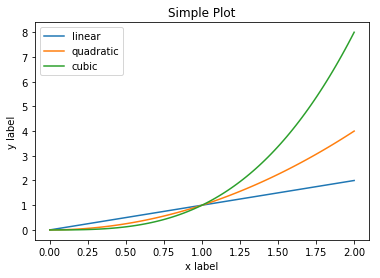